In [67]:
#Load the necessary libraries

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist
import numpy as np
import os
import tensorflow as tf

X, Y, test_x, test_y = mnist.load_data(one_hot=True)

X = X.reshape([-1, 28, 28])
test_x = test_x.reshape([-1, 28, 28])

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [95]:
import cv2
from tqdm import tqdm 

X_temp = []

for i in tqdm(range(0,len(X))):
    temp = cv2.resize(X_1[i],(10,10))
    temp = cv2.resize(temp,(28,28))
    X_temp = np.append(X_temp,temp)

100%|██████████████████████████████████████████████████████████████████████████| 55000/55000 [1:45:33<00:00,  3.94it/s]


In [50]:
import cv2
from tqdm import tqdm 

X_temp = []

for i in tqdm(range(0,len(test_x))):
    temp = cv2.resize(test_x[i],(10,10))
    temp = cv2.resize(temp,(28,28))
    X_temp = np.append(X_temp,temp)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:03<00:00, 54.39it/s]


In [51]:
X_temp=X_temp.reshape(10000,28,28)

In [53]:
np.save('data_Blured_mnist_test_images.npy',X_temp)

In [105]:
np.save('data_Blured_mnist_images.npy',X_temp)

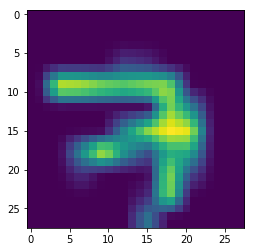

In [54]:
# Example of blured Image


plt.imshow(X_input_train[0])
plt.show()


In [65]:
X_input_train = np.load('data_Blured_mnist_images.npy')
X_input_test = np.load('data_Blured_mnist_test_images.npy')


In [68]:
# Data to test 

testData = []

In [69]:

tf.reset_default_graph()

IMG_SIZE = 28


MODEL_NAME = 'AutoEncoder-{}-{}.model'.format('5', '2conv-basic') # just so we remember which saved model is which, sizes must match


# Building convolutional convnet
convnet = input_data(shape=[None, 28, 28, 1], name='input')
# http://tflearn.org/layers/conv/
# http://tflearn.org/activations/
convnet = conv_2d(convnet, 32, 2, activation='relu', strides=1, padding='same' , bias=True)
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu', strides=1, padding='same' , bias=True)
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 256, 2, activation='relu', strides=1, padding='same' , bias=True)

'''convnet = conv_2d(convnet, 512, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 256, 2, activation='relu', strides=1, padding='same' , bias=True)'''

convnet = conv_2d(convnet, 128, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 64, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 32, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 1, 2, activation='relu', strides=1, padding='same' , bias=True)

print(convnet.get_shape())

convnet = regression(convnet, optimizer='adam', learning_rate=0.01, loss='mean_square', name='targets')

model = tflearn.DNN(convnet,tensorboard_dir='AutoEncoder_log')


if os.path.exists('./{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')



X_1 = np.array([i for i in X]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_input_train_1 = np.array([i for i in X_input_train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)

test_x = test_x[:-10]

testData = X_input_test[-10:]
X_input_test = X_input_test[:-10]

test_x_1 = np.array([i for i in test_x]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_input_test_1 = np.array([i for i in X_input_test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print(X[0].shape)
print(test_x[0].shape)

model.fit({'input': X_input_train_1}, {'targets': X_1}, n_epoch=10, validation_set=({'input': X_input_test_1}, {'targets': test_x_1}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

model.save(MODEL_NAME)

Training Step: 8599  | total loss: 0.01533 | time: 239.412s
| Adam | epoch: 010 | loss: 0.01533 - acc: 0.5313 -- iter: 54976/55000
Training Step: 8600  | total loss: 0.01500 | time: 251.857s
| Adam | epoch: 010 | loss: 0.01500 - acc: 0.5352 | val_loss: 0.01108 - val_acc: 0.5656 -- iter: 55000/55000
--
INFO:tensorflow:C:\Users\Shekhar Shiroor\AutoEncoder-5-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [70]:
tf.reset_default_graph()

IMG_SIZE = 28


MODEL_NAME = 'AutoEncoder-{}-{}.model'.format('5', '2conv-basic') # just so we remember which saved model is which, sizes must match


# Building convolutional convnet
convnet = input_data(shape=[None, 28, 28, 1], name='input')
# http://tflearn.org/layers/conv/
# http://tflearn.org/activations/
convnet = conv_2d(convnet, 32, 2, activation='relu', strides=1, padding='same' , bias=True)
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu', strides=1, padding='same' , bias=True)
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 256, 2, activation='relu', strides=1, padding='same' , bias=True)

'''convnet = conv_2d(convnet, 512, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 256, 2, activation='relu', strides=1, padding='same' , bias=True)'''

convnet = conv_2d(convnet, 128, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 64, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 32, 2, activation='relu', strides=1, padding='same' , bias=True)

convnet = conv_2d(convnet, 1, 2, activation='relu', strides=1, padding='same' , bias=True)

print(convnet.get_shape())

convnet = regression(convnet, optimizer='adam', learning_rate=0.01, loss='mean_square', name='targets')

model = tflearn.DNN(convnet,tensorboard_dir='AutoEncoder_log')


if os.path.exists('./{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')
    

result = []

for i in tqdm(range(0,10)):
    model_out = model.predict(testData[i].reshape(-1,28,28,1))
    result = np.append(result,(testData[i],model_out))
    
    


(?, 28, 28, 1)
model loaded!


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.13it/s]


Populating the interactive namespace from numpy and matplotlib


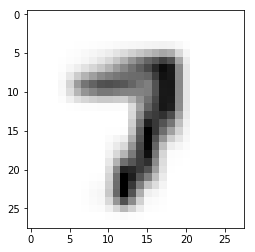

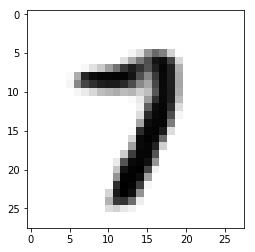

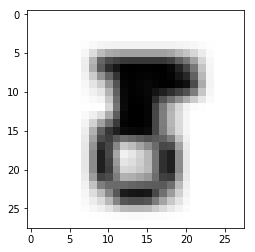

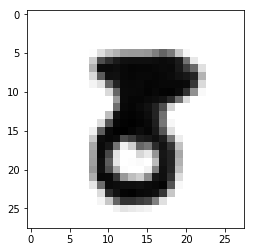

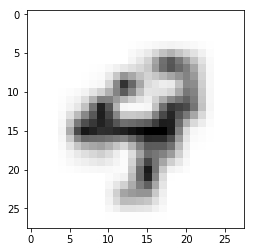

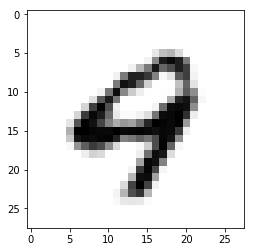

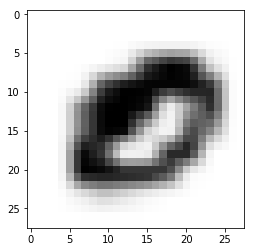

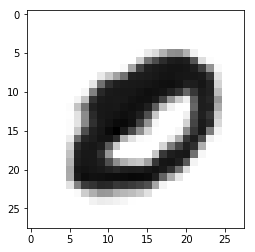

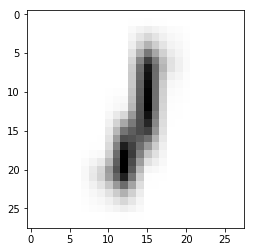

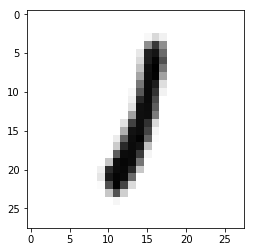

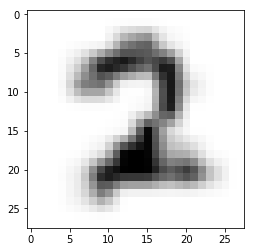

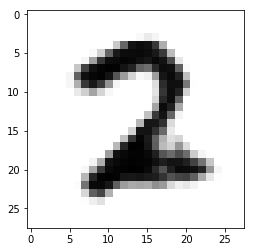

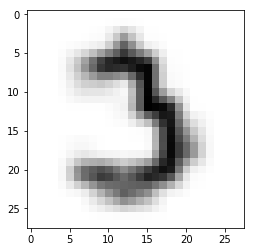

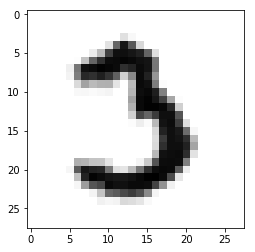

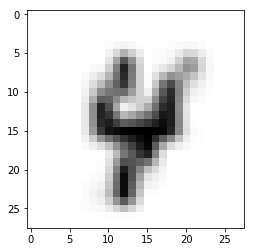

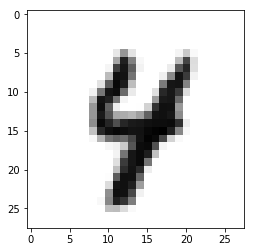

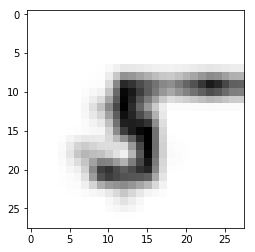

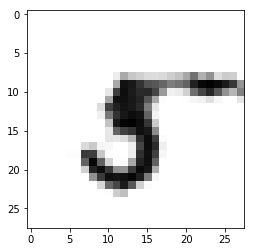

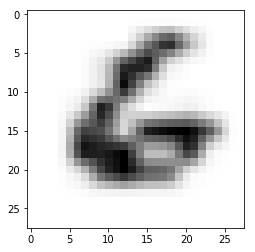

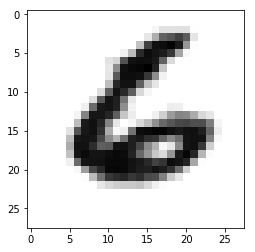

In [72]:

%pylab inline
import matplotlib.pyplot as plt

result = result.reshape(10,2)

for i in range(0,10):
    plt.imshow(result[i][0].reshape(28,28), cmap='Greys')
    plt.show()

    plt.imshow(result[i][1].reshape(28,28), cmap='Greys')
    plt.show()



# Testing the Model on random input samples from training data.

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.06it/s]


Populating the interactive namespace from numpy and matplotlib


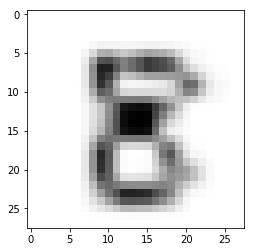

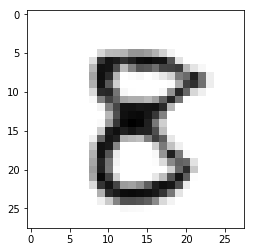

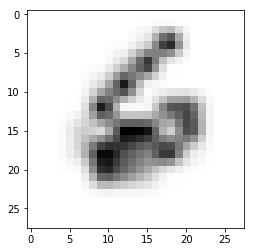

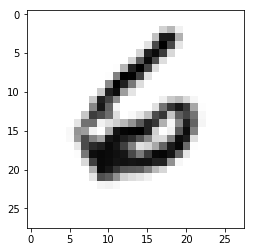

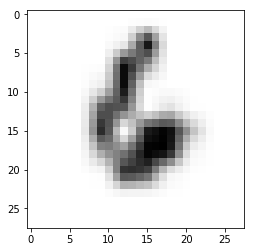

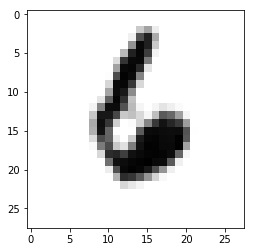

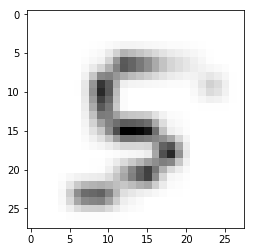

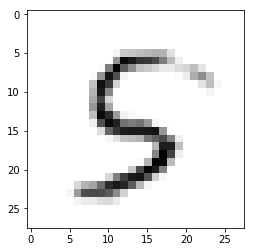

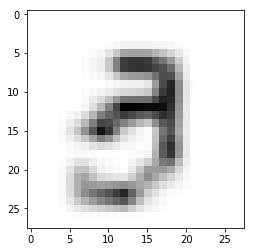

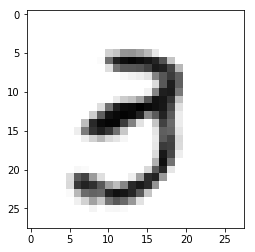

In [78]:
result = []

for i in tqdm(range(0,5)):
    model_out = model.predict(X_input_train_1[i+7777*(i+1)].reshape(-1,28,28,1))
    result = np.append(result,(X_input_train_1[i+7777*(i+1)],model_out))
    
    
%pylab inline
import matplotlib.pyplot as plt

result = result.reshape(5,2)

for i in range(0,5):
    plt.imshow(result[i][0].reshape(28,28), cmap='Greys')
    plt.show()

    plt.imshow(result[i][1].reshape(28,28), cmap='Greys')
    plt.show()

